In [1]:
import pandas as pd

# CSV content
csv_data = """MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
1,Inception,Sci-Fi,2010-07-16,8.8,825532764,160000000
2,The Dark Knight,Action,2008-07-18,9.0,1004558444,185000000
3,Titanic,Romance,1997-12-19,7.8,2187463944,200000000
4,Interstellar,Sci-Fi,2014-11-07,8.6,677471339,165000000
5,Joker,Drama,2019-10-04,8.4,1074251311,55000000
6,The Notebook,Romance,2004-06-25,7.9,,29000000
7,Avengers: Endgame,Action,2019-04-26,8.4,2797800564,356000000
"""

# Write to a CSV file
with open("movies.csv", "w") as file:
    file.write(csv_data)

# Load and display the DataFrame
df = pd.read_csv("movies.csv")
print("🎬 Movie Data:")
print(df)


🎬 Movie Data:
   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


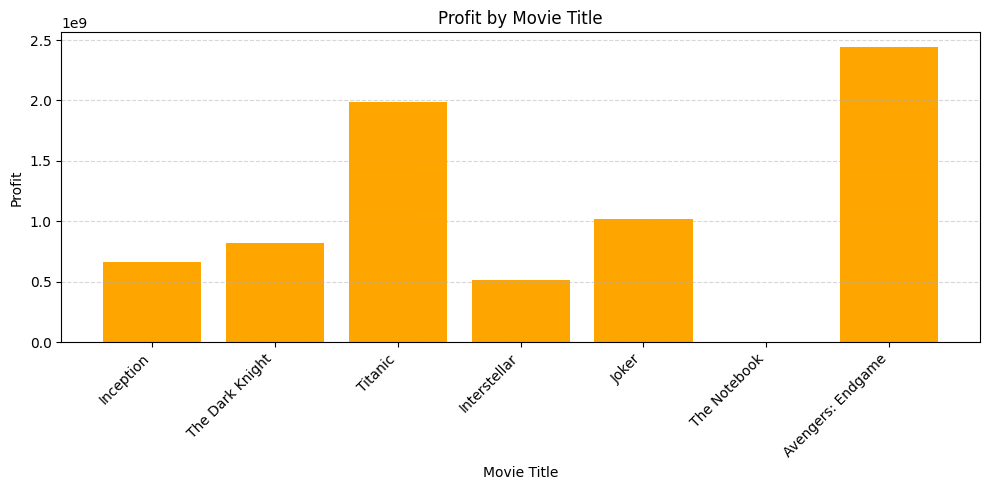

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load movies.csv
df = pd.read_csv("movies.csv")

# Step 2: Convert ReleaseDate to datetime
df["ReleaseDate"] = pd.to_datetime(df["ReleaseDate"])

# Step 3: Calculate Profit = Revenue - Budget
df["Profit"] = df["Revenue"] - df["Budget"]

# Step 4: Add Era column
def classify_era(date):
    year = date.year
    if year < 2000:
        return "Classic"
    elif 2000 <= year <= 2010:
        return "Mid"
    else:
        return "Modern"

df["Era"] = df["ReleaseDate"].apply(classify_era)

# Step 5: Handle nulls in Revenue (fill with average)
df["Revenue"] = df["Revenue"].fillna(df["Revenue"].mean())

# Step 6: Sort by Rating descending
df_sorted = df.sort_values(by="Rating", ascending=False)

# Step 7: Group by Genre → average Rating & total Revenue
genre_stats = df.groupby("Genre").agg(
    Avg_Rating=("Rating", "mean"),
    Total_Revenue=("Revenue", "sum")
).reset_index()

# Step 8: Filter movies with Rating ≥ 8.5 and Profit > 500M
filtered_movies = df[(df["Rating"] >= 8.5) & (df["Profit"] > 500_000_000)]

# Step 9: Bar chart of Movie Title vs Profit
plt.figure(figsize=(10, 5))
plt.bar(df["Title"], df["Profit"], color="orange")
plt.title("Profit by Movie Title")
plt.xlabel("Movie Title")
plt.ylabel("Profit")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [3]:
df = pd.read_csv("movies.csv")
df["ReleaseDate"] = pd.to_datetime(df["ReleaseDate"])


In [4]:
df["Profit"] = df["Revenue"] - df["Budget"]


In [5]:
print(df[["Title", "Revenue", "Budget", "Profit"]])


               Title       Revenue     Budget        Profit
0          Inception  8.255328e+08  160000000  6.655328e+08
1    The Dark Knight  1.004558e+09  185000000  8.195584e+08
2            Titanic  2.187464e+09  200000000  1.987464e+09
3       Interstellar  6.774713e+08  165000000  5.124713e+08
4              Joker  1.074251e+09   55000000  1.019251e+09
5       The Notebook           NaN   29000000           NaN
6  Avengers: Endgame  2.797801e+09  356000000  2.441801e+09


In [6]:
df["Era"] = df["ReleaseDate"].apply(classify_era)


In [7]:
print(df[["Title", "ReleaseDate", "Era"]])
df["Revenue"] = df["Revenue"].fillna(df["Revenue"].mean())


               Title ReleaseDate      Era
0          Inception  2010-07-16      Mid
1    The Dark Knight  2008-07-18      Mid
2            Titanic  1997-12-19  Classic
3       Interstellar  2014-11-07   Modern
4              Joker  2019-10-04   Modern
5       The Notebook  2004-06-25      Mid
6  Avengers: Endgame  2019-04-26   Modern


In [ ]:
print(df[df["Title"] == "The Notebook"])


In [8]:
df_sorted = df.sort_values(by="Rating", ascending=False)
print(df_sorted[["Title", "Rating"]])


               Title  Rating
1    The Dark Knight     9.0
0          Inception     8.8
3       Interstellar     8.6
6  Avengers: Endgame     8.4
4              Joker     8.4
5       The Notebook     7.9
2            Titanic     7.8


In [9]:
genre_stats = df.groupby("Genre").agg(
    Avg_Rating=("Rating", "mean"),
    Total_Revenue=("Revenue", "sum")
).reset_index()
print("\n Genre Stats:\n", genre_stats)



 Genre Stats:
      Genre  Avg_Rating  Total_Revenue
0   Action        8.70   3.802359e+09
1    Drama        8.40   1.074251e+09
2  Romance        7.85   3.615310e+09
3   Sci-Fi        8.70   1.503004e+09


In [10]:
filtered_movies = df[(df["Rating"] >= 8.5) & (df["Profit"] > 500_000_000)]
print("\n High Rating & Profit Movies:\n", filtered_movies[["Title", "Rating", "Profit"]])



 High Rating & Profit Movies:
              Title  Rating       Profit
0        Inception     8.8  665532764.0
1  The Dark Knight     9.0  819558444.0
3     Interstellar     8.6  512471339.0


In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, avg, sum as _sum, to_date, year, month, rank
from pyspark.sql.window import Window

# Start Spark session
spark = SparkSession.builder.appName("MovieAnalysis").getOrCreate()


In [16]:
# Step 1: Load CSV
df = spark.read.option("header", True).option("inferSchema", True).csv("movies.csv")

# Step 2: Create Profit column
df = df.withColumn("Profit", col("Revenue") - col("Budget"))

# Step 3: Filter where Genre = 'Sci-Fi' and Profit > 500000000
sci_fi_hits = df.filter((col("Genre") == "Sci-Fi") & (col("Profit") > 500_000_000))
print("3: Sci-Fi movies with Profit > 500M")
sci_fi_hits.show()

# Step 4: Group by Genre → avg(Rating), sum(Profit)
genre_grouped = df.groupBy("Genre").agg(
    avg("Rating").alias("Average_Rating"),
    _sum("Profit").alias("Total_Profit")
)
print("  4: Genre stats (Avg Rating, Total Profit)")
genre_grouped.show()

# Step 5: Classify Rating using when().otherwise()
df = df.withColumn("RatingLevel",
    when(col("Rating") == 9.0, "Blockbuster")
    .when((col("Rating") >= 8.0) & (col("Rating") < 9.0), "Hit")
    .otherwise("Average")
)

print("  5: Rating Classification")
df.select("Title", "Rating", "RatingLevel").show()

# Step 6: Drop the Budget column
df = df.drop("Budget")
print("  6: Dropped 'Budget' column. Current columns:")
print(df.columns)

# Step 7: Fill nulls in Revenue with average
avg_revenue = df.select(avg("Revenue")).first()[0]
df = df.na.fill({"Revenue": avg_revenue})

print(" : Filled nulls in Revenue with average.")
df.select("Title", "Revenue").show()

# Step 8: Convert ReleaseDate to date type, extract Year and Month
df = df.withColumn("ReleaseDate", to_date("ReleaseDate", "yyyy-MM-dd"))
df = df.withColumn("Year", year("ReleaseDate"))
df = df.withColumn("Month", month("ReleaseDate"))

print(" : Extracted Year and Month from ReleaseDate")
df.select("Title", "ReleaseDate", "Year", "Month").show()

# Step 9: Rank movies within each genre by Profit
window_spec = Window.partitionBy("Genre").orderBy(col("Profit").desc())
df = df.withColumn("GenreProfitRank", rank().over(window_spec))

print(" 9: Ranking movies within Genre by Profit")
df.select("Title", "Genre", "Profit", "GenreProfitRank").show()


3: Sci-Fi movies with Profit > 500M
+-------+------------+------+-----------+------+---------+---------+---------+
|MovieID|       Title| Genre|ReleaseDate|Rating|  Revenue|   Budget|   Profit|
+-------+------------+------+-----------+------+---------+---------+---------+
|      1|   Inception|Sci-Fi| 2010-07-16|   8.8|825532764|160000000|665532764|
|      4|Interstellar|Sci-Fi| 2014-11-07|   8.6|677471339|165000000|512471339|
+-------+------------+------+-----------+------+---------+---------+---------+

  4: Genre stats (Avg Rating, Total Profit)
+-------+--------------+------------+
|  Genre|Average_Rating|Total_Profit|
+-------+--------------+------------+
|Romance|          7.85|  1987463944|
|  Drama|           8.4|  1019251311|
| Action|           8.7|  3261359008|
| Sci-Fi|           8.7|  1178004103|
+-------+--------------+------------+

  5: Rating Classification
+-----------------+------+-----------+
|            Title|Rating|RatingLevel|
+-----------------+------+---------

In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, to_date, avg, sum as _sum, year, month, rank
from pyspark.sql.window import Window

spark = SparkSession.builder.appName("MovieUnionExample").getOrCreate()


In [18]:
# Step 1: Create the bonus JSON file
bonus_json = """
[
  {"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue": 1456000000, "Budget": 145000000},
  {"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue": 950000000, "Budget": 100000000}
]
"""

with open("movies_bonus.json", "w") as f:
    f.write(bonus_json)

# Read the JSON into PySpark
df_bonus = spark.read.option("multiLine", True).json("movies_bonus.json")
df_bonus.show()


+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+



+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+

+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Top ROI Movies (Budget ≥ 50M):
+-----------------+------------------+
|            Title|ReturnOnInvestment|
+-----------------+------------------+
|            Joker| 18.53184201818182|
|          Titanic|        9.93731972|
|           Barbie| 9.041379310344828|
|      Oppenheimer|               8.5|
|Avengers: Endgame| 6.858990348314607|
|  The Dark Knight| 4.430045643243243|
|        Inception|       4.159579775|
|     Interstellar| 3.105886903030303|
+-----------------+------------------+



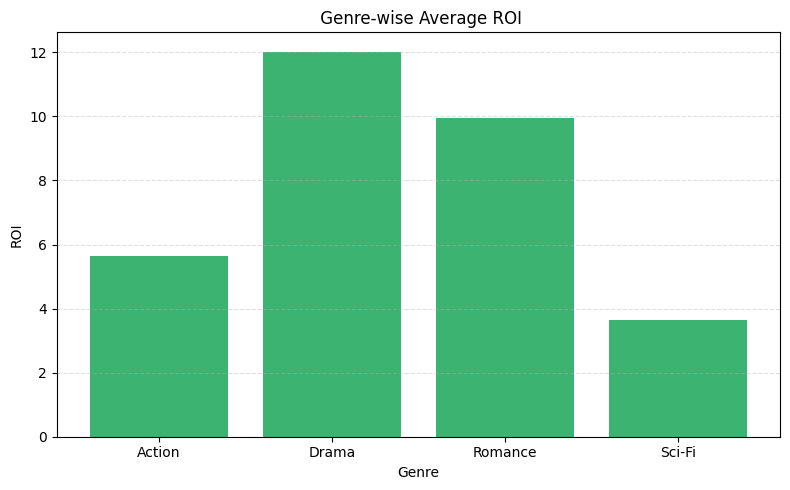

In [23]:
# JSON content
bonus_json = """
[
  {"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue": 1456000000, "Budget": 145000000},
  {"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue": 950000000, "Budget": 100000000}
]
"""

# Save JSON
with open("movies_bonus.json", "w") as f:
    f.write(bonus_json)

# Read using PySpark
df_bonus = spark.read.option("multiLine", True).json("movies_bonus.json")
df_bonus.show()
# Read original CSV
df_main = spark.read.option("header", True).option("inferSchema", True).csv("movies.csv")

# Add Profit column to both
df_main = df_main.withColumn("Profit", col("Revenue") - col("Budget"))
df_bonus = df_bonus.withColumn("Profit", col("Revenue") - col("Budget"))

# Add missing column ReleaseDate to df_bonus
df_bonus = df_bonus.withColumn("ReleaseDate", lit(None).cast("string"))

# Reorder bonus columns to match df_main
df_bonus = df_bonus.select(df_main.columns)

# Safe union
df_merged = df_main.unionByName(df_bonus)
df_merged.show()
top_grossing = df_merged.orderBy(col("Revenue").desc()).limit(5)
print("\n Top 5 Highest Grossing Movies:")
top_grossing.select("Title", "Revenue").show()

df_merged.write.mode("overwrite").option("header", True).csv("final_merged_movies")

# Optional: Download as ZIP
!zip -r final_merged_movies.zip final_merged_movies
from google.colab import files
files.download("final_merged_movies.zip")
df_roi = df_merged.withColumn("ReturnOnInvestment", col("Profit") / col("Budget"))
df_roi_filtered = df_roi.filter(col("Budget") >= 50000000)

# Show Top ROI Movies
print(" Top ROI Movies (Budget ≥ 50M):")
df_roi_filtered.orderBy(col("ReturnOnInvestment").desc()).select("Title", "ReturnOnInvestment").show()
# Convert to Pandas
pdf = df_roi_filtered.select("Genre", "ReturnOnInvestment").toPandas()

# Group by Genre
genre_roi = pdf.groupby("Genre")["ReturnOnInvestment"].mean().reset_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(genre_roi["Genre"], genre_roi["ReturnOnInvestment"], color="mediumseagreen")
plt.title(" Genre-wise Average ROI")
plt.xlabel("Genre")
plt.ylabel("ROI")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

